In [91]:
# Minhaz
# Assignment - outlier handling using IQR and ZSCORE on beer serving / wine serviing data (remaining task of session)
# as new file

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv(r"C:\Minhaz Local files\DSA\DSA 02 2024\beer-servings.csv", index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [95]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [96]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [97]:
# Handling missing values and outliers in Beer_serving

In [98]:
# Find and fix Misssing values

In [99]:
data["beer_servings"].isna().sum()

8

In [100]:
data['beer_servings']= data['beer_servings'].fillna(data['beer_servings'].median())

In [101]:
data["beer_servings"].isna().sum()

0

In [102]:
# Handling outliers

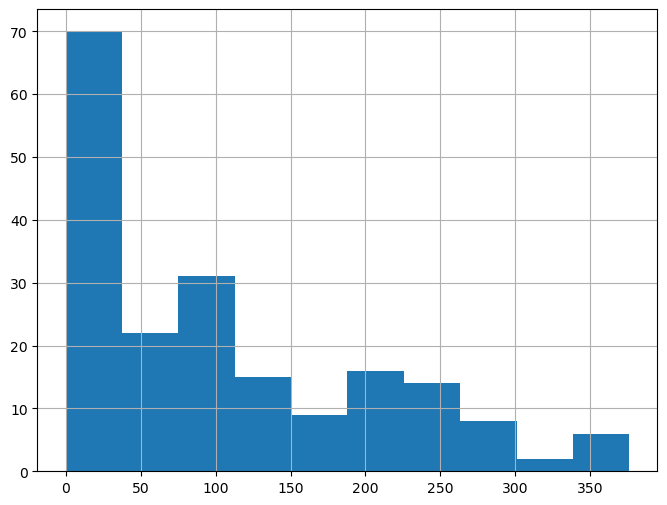

In [103]:
freqgraph= data["beer_servings"]
freqgraph.hist(figsize=(8,6));

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4fc952a50>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4fc9500d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4f7068b10>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4fca302d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4fca39910>],
 'means': []}

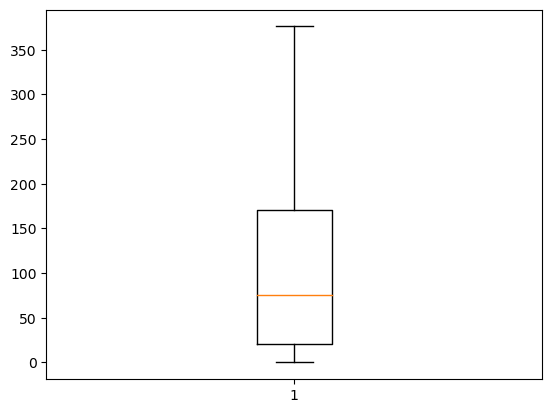

In [104]:
plt.boxplot(data["beer_servings"])

In [105]:
# Note that there is no outlier in beer serving column, eventhough descibing codes as below to hanle the outliers using IQR
# and ZScore

In [106]:
Q1 = np.percentile(data['beer_servings'],25,method='midpoint')
Q2 = np.percentile(data['beer_servings'],50,method='midpoint')
Q3 = np.percentile(data['beer_servings'],75,method='midpoint')

In [107]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 21.0
Q2 is 76.0
Q3 is 171.0


In [108]:
IQR = Q3-Q1
IQR

150.0

In [109]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is -204.0
Upper limit is 396.0


In [110]:
outlier = []
for x in data['beer_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print ("Outliers in beer_serving:", outlier)

Outliers in beer_serving: []


In [111]:
# ZSCORE method
# Only wine servings column (has to remove the remaining columns)

In [112]:
import seaborn as sns

In [113]:
data = pd.read_csv(r"C:\Minhaz Local files\DSA\DSA 02 2024\beer-servings.csv", index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


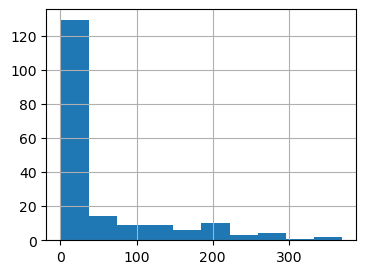

In [114]:
freqgraph= data["wine_servings"]
freqgraph.hist(figsize=(4,3));#(8,6)

C:\Users\mamin\AppData\Local\Temp\ipykernel_26448\4032429737.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wine_servings'])


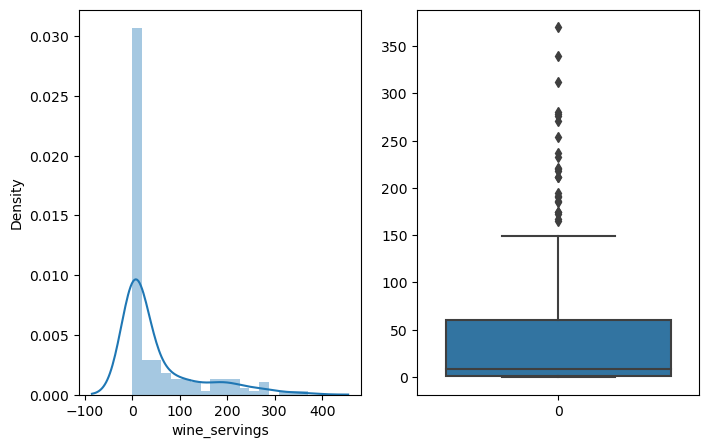

In [115]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(data['wine_servings'])

plt.subplot(1,2,2)
sns.boxplot(data['wine_servings'])
plt.show()

In [116]:
from scipy.stats import zscore
zscore = zscore(data.wine_servings,nan_policy='omit')
data['zscore'] = zscore
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.625948
1,Albania,89.0,132.0,54.0,4.9,Europe,0.047842
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.451262
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.267059
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.064456


In [117]:
data.drop(columns = ['beer_servings','spirit_servings','total_litres_of_pure_alcohol'],axis = 1 ,inplace = True)
data.head()

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
3,Andorra,312.0,Europe,3.267059
4,Angola,45.0,Africa,-0.064456


In [118]:
print("Mean of data",data['wine_servings'].mean())
print("Std deviation of data",data['wine_servings'].std())
print("Max of data",data['wine_servings'].max())
print("Min of data",data['wine_servings'].min())

Mean of data 50.16577540106952
Std deviation of data 80.35886783413324
Max of data 370.0
Min of data 0.0


In [119]:
low_lim = data.wine_servings.mean() - 3 * data.wine_servings.std()
up_lim = data.wine_servings.mean() + 3 * data.wine_servings.std()

print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is -190.9108281013302
Upper limit is 291.2423789034692


In [120]:
data[(data.zscore < -3) | (data.zscore > 3)]
#to detect the outliers

,country,wine_servings,continent,zscore
3,Andorra,312.0,Europe,3.267059
61,France,370.0,Europe,3.990759
136,Portugal,339.0,Europe,3.603953


In [121]:
data = data[(data.zscore > -3) & (data.zscore < 3)]
data

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037


{'whiskers': [<matplotlib.lines.Line2D at 0x2d4fa56ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4fcb6f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4fcb6d8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4fcb80910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4fc9a10d0>],
 'means': []}

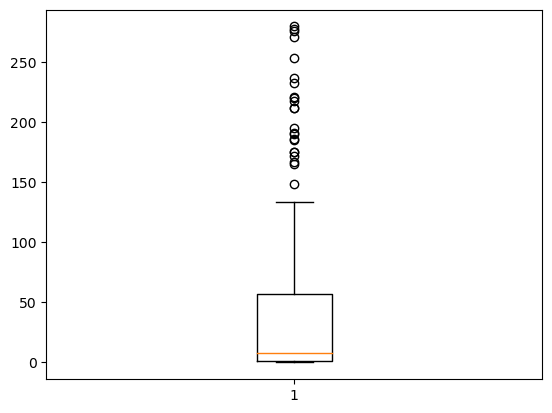

In [122]:
plt.boxplot(data["wine_servings"])

In [123]:
# Outliers removed from column Wine servings.